In [51]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq, fftshift, ifft

In [52]:
def f(t, alpha):
    return np.exp(-alpha * t**2)

In [53]:
def h(t):
    return np.where(np.abs(t) < 1, 1 - np.abs(t), 0)

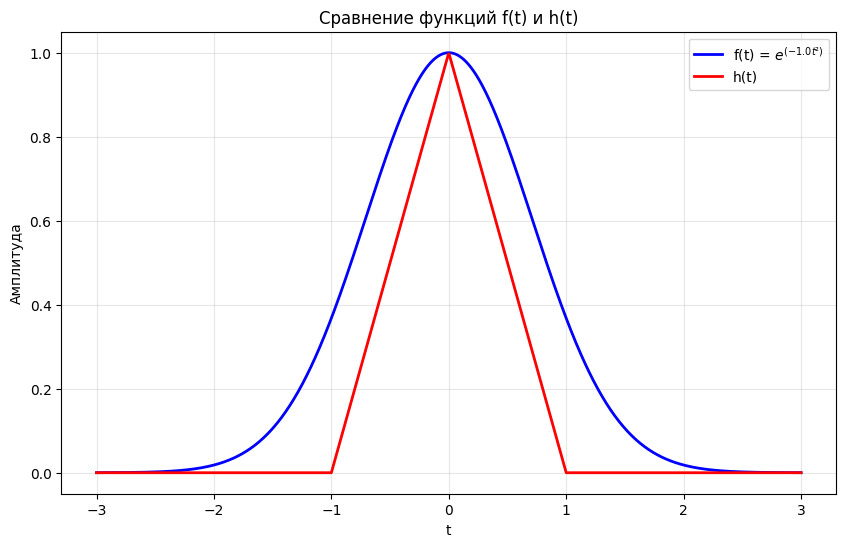

In [54]:
t = np.linspace(-3, 3, 1000)

alpha = 1.0 

plt.figure(figsize=(10, 6))
plt.plot(t, f(t, alpha), 'b-', linewidth=2, label=f'f(t) = $e^{{(-{alpha}t²)}}$')
plt.plot(t, h(t), 'r-', linewidth=2, label='h(t)')
plt.title('Сравнение функций f(t) и h(t)')
plt.xlabel('t')
plt.ylabel('Амплитуда')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

In [55]:
def convolution_point(tau, t, f_vals, h_vals):
    h_shifted = np.interp(tau - t, t, h_vals)
    integrand = f_vals * h_shifted
    result = np.trapezoid(integrand, t)
    return result

Вычисление свёртки...
Вычислено 0/200 точек
Вычислено 40/200 точек
Вычислено 80/200 точек
Вычислено 120/200 точек
Вычислено 160/200 точек


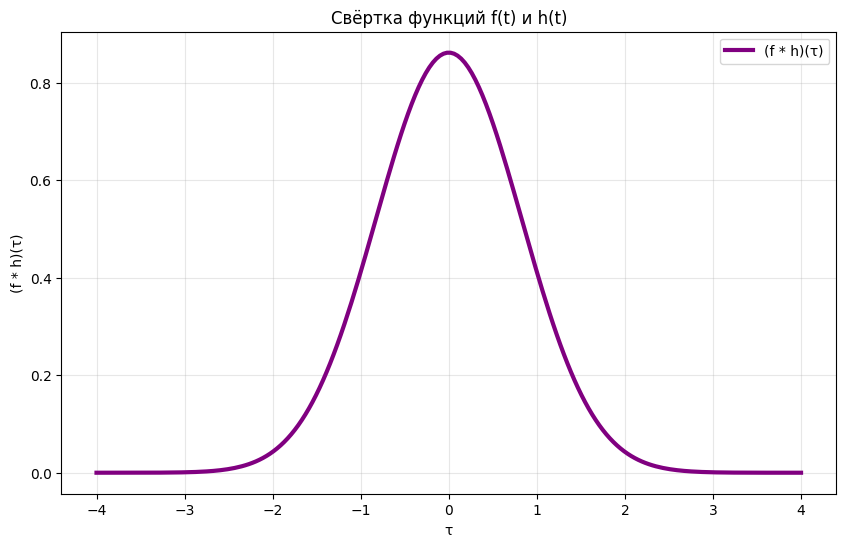

In [ ]:
t_max = 3.0

f_vals = f(t, alpha)
h_vals = h(t)

tau_range = np.linspace(-4, 4, 200)
convolution_result = np.zeros_like(tau_range)

for i, tau in enumerate(tau_range):
    convolution_result[i] = convolution_point(tau, t, f_vals, h_vals)

plt.figure(figsize=(10, 6))
plt.plot(tau_range, convolution_result, 'purple', linewidth=3, label='(f * h)(τ)')
plt.title('Свёртка функций f(t) и h(t)')
plt.xlabel('τ')
plt.ylabel('(f * h)(τ)')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()


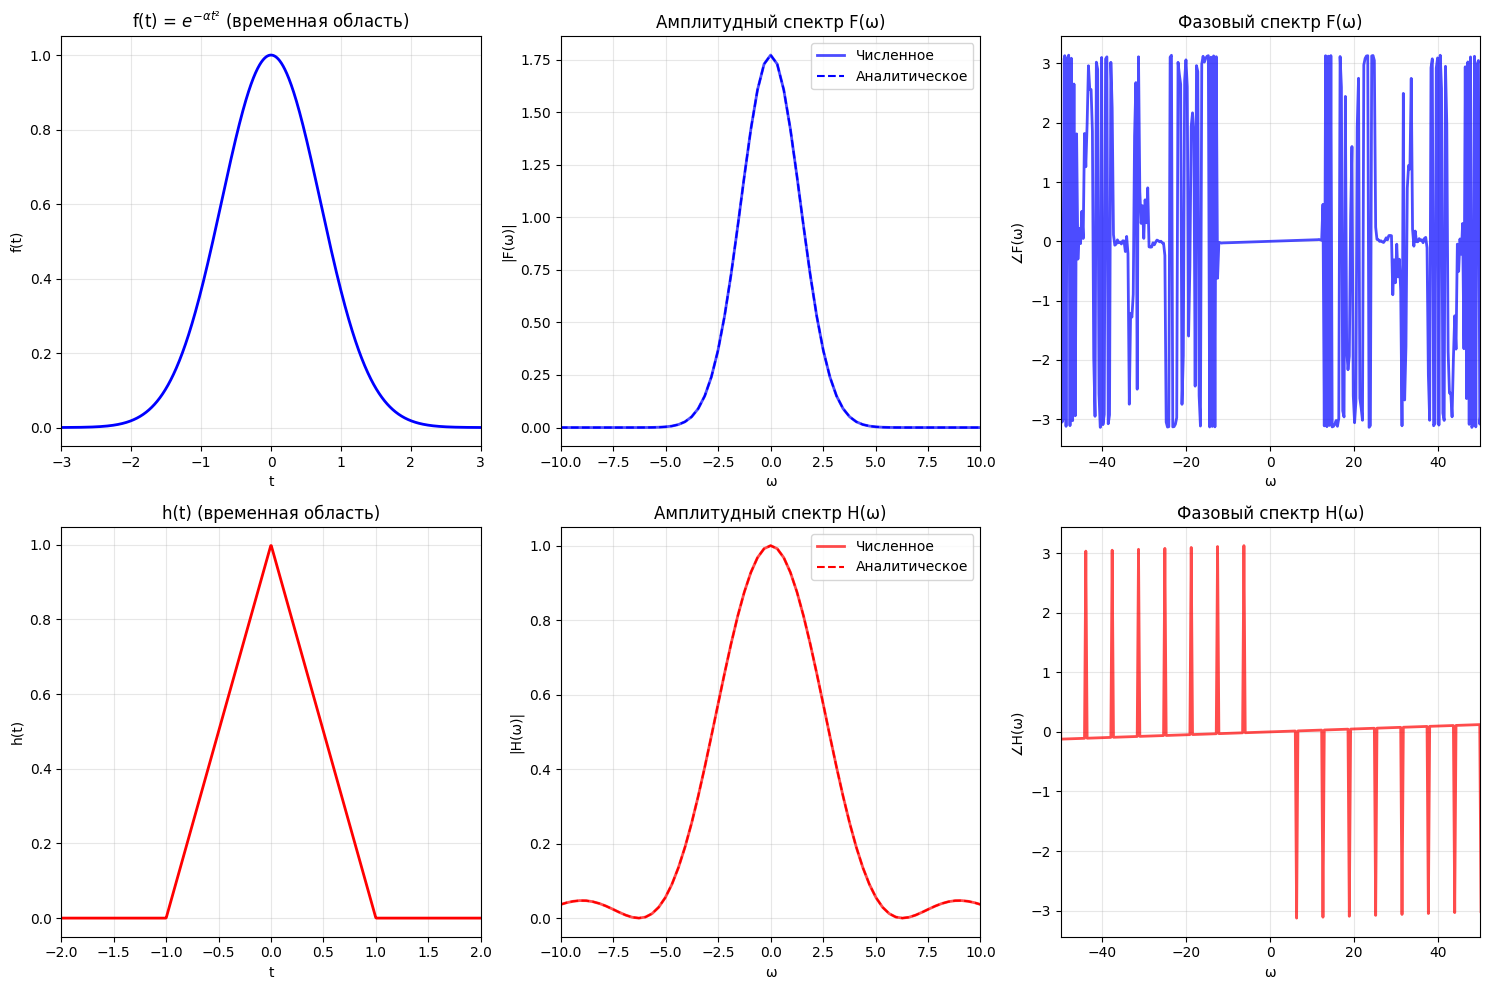

In [61]:
f_vals = f(t, alpha)
h_vals = h(t)
dt = t[1] - t[0]

f_fft = fftshift(fft(fftshift(f_vals))) * dt
h_fft = fftshift(fft(fftshift(h_vals))) * dt

freqs = fftshift(fftfreq(len(t), dt))
omega = 2 * np.pi * freqs

def f_analytic(omega, alpha=alpha):
    return np.sqrt(np.pi/alpha) * np.exp(-omega**2 / (4*alpha))

def h_analytic(omega):
    result = np.zeros_like(omega)
    mask = omega != 0
    result[~mask] = 1.0 
    result[mask] = 2 * (1 - np.cos(omega[mask])) / (omega[mask]**2)
    return result

f_analytic_vals = f_analytic(omega)
h_analytic_vals = h_analytic(omega)

plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.plot(t, f_vals, 'b-', linewidth=2)
plt.title('f(t) = $e^{-αt²}$ (временная область)')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.grid(True, alpha=0.3)
plt.xlim(-3, 3)

plt.subplot(2, 3, 4)
plt.plot(t, h_vals, 'r-', linewidth=2)
plt.title('h(t) (временная область)')
plt.xlabel('t')
plt.ylabel('h(t)')
plt.grid(True, alpha=0.3)
plt.xlim(-2, 2)

plt.subplot(2, 3, 2)
plt.plot(omega, np.abs(f_fft), 'b-', linewidth=2, alpha=0.7, label='Численное')
plt.plot(omega, np.abs(f_analytic_vals), 'b--', linewidth=1.5, label='Аналитическое')
plt.title('Амплитудный спектр F(ω)')
plt.xlabel('ω')
plt.ylabel('|F(ω)|')
plt.grid(True, alpha=0.3)
plt.legend()
plt.xlim(-10, 10)

plt.subplot(2, 3, 5)
plt.plot(omega, np.abs(h_fft), 'r-', linewidth=2, alpha=0.7, label='Численное')
plt.plot(omega, np.abs(h_analytic_vals), 'r--', linewidth=1.5, label='Аналитическое')
plt.title('Амплитудный спектр H(ω)')
plt.xlabel('ω')
plt.ylabel('|H(ω)|')
plt.grid(True, alpha=0.3)
plt.legend()
plt.xlim(-10, 10)

plt.subplot(2, 3, 3)
plt.plot(omega, np.angle(f_fft), 'b-', linewidth=2, alpha=0.7)
plt.title('Фазовый спектр F(ω)')
plt.xlabel('ω')
plt.ylabel('∠F(ω)')
plt.grid(True, alpha=0.3)
plt.xlim(-50, 50)

plt.subplot(2, 3, 6)
plt.plot(omega, np.angle(h_fft), 'r-', linewidth=2, alpha=0.7)
plt.title('Фазовый спектр H(ω)')
plt.xlabel('ω')
plt.ylabel('∠H(ω)')
plt.grid(True, alpha=0.3)
plt.xlim(-50, 50)

plt.tight_layout()
plt.show()

/tmp/ipykernel_54672/3285781320.py:31: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  convolution_direct[i] = np.trapz(integrand, t)


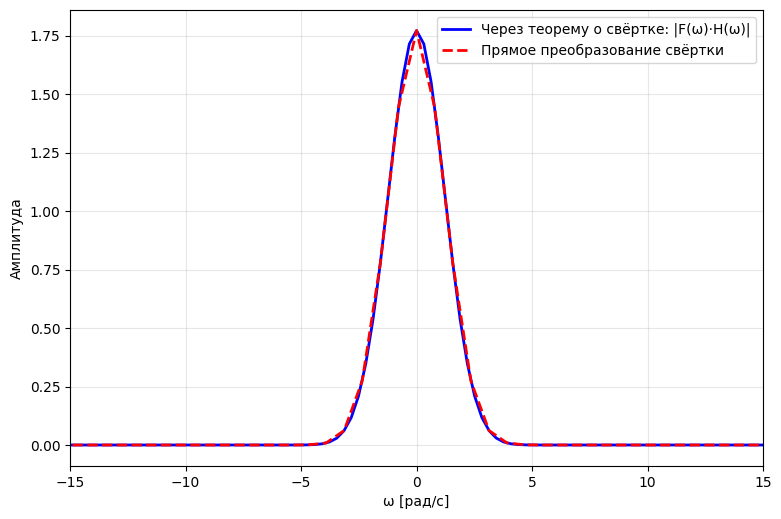

In [ ]:
alpha = 1.0
t_max = 10.0
num_points = 4096

t = np.linspace(-t_max, t_max, num_points)
dt = t[1] - t[0]

def f(t, alpha=alpha):
    return np.exp(-alpha * t**2)

def h(t):
    return np.where(np.abs(t) < 1, 1 - np.abs(t), 0)

f_vals = f(t)
h_vals = h(t)

f_fft = fftshift(fft(fftshift(f_vals))) * dt
h_fft = fftshift(fft(fftshift(h_vals))) * dt

convolution_spectrum = f_fft * h_fft

convolution_freq = fftshift(ifft(fftshift(convolution_spectrum / dt)))
convolution_time_freq = np.real(convolution_freq) * num_points

tau_range = np.linspace(-4, 4, 500)
convolution_direct = np.zeros_like(tau_range)

for i, tau in enumerate(tau_range):
    h_shifted = np.interp(tau - t, t, h_vals)
    integrand = f_vals * h_shifted
    convolution_direct[i] = np.trapz(integrand, t)

convolution_direct_fft = fftshift(fft(fftshift(convolution_direct))) * (tau_range[1] - tau_range[0])

omega_theorem = 2 * np.pi * fftshift(fftfreq(len(t), dt))
omega_direct = 2 * np.pi * fftshift(fftfreq(len(tau_range), tau_range[1] - tau_range[0]))
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.plot(omega_theorem, np.abs(convolution_spectrum), 'b-', linewidth=2, 
         label='Через теорему о свёртке: |F(ω)·H(ω)|')
plt.plot(omega_direct, np.abs(convolution_direct_fft), 'r--', linewidth=2, 
         label='Прямое преобразование свёртки')
plt.xlabel('ω')
plt.ylabel('Амплитуда')
plt.grid(True, alpha=0.3)
plt.legend()
plt.xlim(-15, 15)

plt.tight_layout()
plt.show()